In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\Aniket\Desktop\BI\MiniProject\indian_restaurants_details_cleaned_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224520 entries, 0 to 224519
Data columns (total 17 columns):
zomato_url           224520 non-null object
name                 224520 non-null object
city                 224520 non-null object
area                 224520 non-null object
rating               144735 non-null float64
rating_count         142397 non-null float64
telephone            222930 non-null object
cusine               223190 non-null object
cost_for_two         220872 non-null float64
address              222735 non-null object
timings              221556 non-null object
online_order         224520 non-null bool
table_reservation    224520 non-null bool
delivery_only        224520 non-null bool
famous_food          52526 non-null object
longitude            224511 non-null float64
latitude             224511 non-null float64
dtypes: bool(3), float64(5), object(9)
memory usage: 24.6+ MB


In [3]:
df.shape

(224520, 17)

In [4]:
df.isnull().sum()

zomato_url                0
name                      0
city                      0
area                      0
rating                79785
rating_count          82123
telephone              1590
cusine                 1330
cost_for_two           3648
address                1785
timings                2964
online_order              0
table_reservation         0
delivery_only             0
famous_food          171994
longitude                 9
latitude                  9
dtype: int64

In [5]:
newdf=df[(df.rating.notnull()) & (df.rating_count.notnull())]
newdf.shape

(142397, 17)

In [6]:
newdf.isnull().sum()

zomato_url               0
name                     0
city                     0
area                     0
rating                   0
rating_count             0
telephone             1045
cusine                 105
cost_for_two          1199
address               1031
timings               1258
online_order             0
table_reservation        0
delivery_only            0
famous_food          90399
longitude                1
latitude                 1
dtype: int64

In [7]:
newdf=newdf[(newdf.cost_for_two.notnull())]
newdf.shape

(141198, 17)

In [8]:
unqdf=newdf.drop_duplicates(subset=['telephone'],keep='first',inplace=False)
unqdf.shape

(125892, 17)

In [9]:
unqdf.isnull().sum()

zomato_url               0
name                     0
city                     0
area                     0
rating                   0
rating_count             0
telephone                1
cusine                  38
cost_for_two             0
address                676
timings                466
online_order             0
table_reservation        0
delivery_only            0
famous_food          79542
longitude                1
latitude                 1
dtype: int64

In [10]:
clean=unqdf.dropna()
clean.shape

(45925, 17)

In [11]:
print(clean.online_order.value_counts())
print(clean.table_reservation.value_counts())
print(clean.delivery_only.value_counts())

True     32907
False    13018
Name: online_order, dtype: int64
False    40422
True      5503
Name: table_reservation, dtype: int64
False    44451
True      1474
Name: delivery_only, dtype: int64


In [12]:
clean=clean[(clean.longitude!=0) & (clean.latitude!=0)]
clean.shape

(45797, 17)

In [13]:
cleaner=clean.drop_duplicates(subset=['address'],keep='first',inplace=False)
cleaner.shape

(44144, 17)

In [14]:
fdf=cleaner
fdf.describe()

,rating,rating_count,cost_for_two,longitude,latitude
count,44144.000000,44144.000000,44144.000000,44144.000000,44144.000000
mean,3.793331,369.089027,628.736544,77.193625,21.278297
std,0.403490,665.181712,476.372811,4.163198,5.839588
min,1.800000,4.000000,50.000000,70.756380,8.384333
25%,3.600000,90.000000,350.000000,73.778071,17.487323
50%,3.800000,178.000000,500.000000,77.155992,19.252370
75%,4.000000,393.000000,700.000000,78.009153,28.410688
max,4.900000,42621.000000,14000.000000,91.832769,34.072370


In [15]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44144 entries, 1 to 224004
Data columns (total 17 columns):
zomato_url           44144 non-null object
name                 44144 non-null object
city                 44144 non-null object
area                 44144 non-null object
rating               44144 non-null float64
rating_count         44144 non-null float64
telephone            44144 non-null object
cusine               44144 non-null object
cost_for_two         44144 non-null float64
address              44144 non-null object
timings              44144 non-null object
online_order         44144 non-null bool
table_reservation    44144 non-null bool
delivery_only        44144 non-null bool
famous_food          44144 non-null object
longitude            44144 non-null float64
latitude             44144 non-null float64
dtypes: bool(3), float64(5), object(9)
memory usage: 5.2+ MB


In [16]:
fdf[['online_order','table_reservation','delivery_only']]=fdf[['online_order','table_reservation','delivery_only']].astype(int)
fdf.dtypes

C:\Users\Aniket\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


zomato_url            object
name                  object
city                  object
area                  object
rating               float64
rating_count         float64
telephone             object
cusine                object
cost_for_two         float64
address               object
timings               object
online_order           int32
table_reservation      int32
delivery_only          int32
famous_food           object
longitude            float64
latitude             float64
dtype: object

In [17]:
fdf.head()

,zomato_url,name,city,area,rating,rating_count,telephone,cusine,cost_for_two,address,timings,online_order,table_reservation,delivery_only,famous_food,longitude,latitude
1,https://www.zomato.com/mumbai/kunals-creamery-...,Kunal's Creamery & Eatery,Mumbai,Ambernath,3.6,51.0,+91 9561356690 +91 9637537499,"Street Food, Chinese, Fast Food",500.0,"Shop 14, Trishul Shivdham Complex, Shiv Mandir...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1...",0,0,0,Penne Pasta,73.184287,19.205887
7,https://www.zomato.com/mumbai/applemint-khargh...,Applemint,Mumbai,Kharghar,3.5,94.0,+91 9820262225,Chinese,200.0,"Shop 32, Hiranandani Crystal Plaza, Sector 7, ...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",1,0,0,"Momos , Liti Chokha , Chicken Momo , Litti , N...",73.065527,19.033390
9,https://www.zomato.com/ncr/food-fantasy-mayur-...,Food Fantasy,Delhi NCR,Mayur Vihar Phase 1,3.8,437.0,00 1122794990 00 1122700251,"North Indian, Chinese, Fast Food",500.0,"P-35-36, Opposite Fine Home Apartments, Mayur ...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1...",1,0,0,"Tandoori Chicken , Pizza , Dal Makhani , Butte...",77.292763,28.608202
10,https://www.zomato.com/mumbai/curry-and-combos...,Curry And Combos Twist,Mumbai,Goregaon East,4.4,92.0,+91 9167227170,"North Indian, Chinese, Fast Food, Pizza, Panin...",550.0,"Shop 6, Mukadam Compound, Off Film City Road, ...","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 1, 1,...",1,0,0,"Kadhai Paneer , Paneer Tikka , Gulab Jamun , C...",72.869879,19.175588
15,https://www.zomato.com/kolkata/food-village-ba...,Food Village,Kolkata,Baranagar,2.8,355.0,033 25787860 +91 9903968613,North Indian,650.0,"144, B.T. Road, Dunlop, Baranagar, Kolkata","{'Mon': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",1,0,0,"Tandoori Chicken , Fish , Bbq Chicken , Veg Pu...",88.377416,22.652427


In [18]:
fdf.describe()

,rating,rating_count,cost_for_two,online_order,table_reservation,delivery_only,longitude,latitude
count,44144.000000,44144.000000,44144.000000,44144.000000,44144.000000,44144.000000,44144.000000,44144.000000
mean,3.793331,369.089027,628.736544,0.725920,0.113968,0.030514,77.193625,21.278297
std,0.403490,665.181712,476.372811,0.446055,0.317776,0.171998,4.163198,5.839588
min,1.800000,4.000000,50.000000,0.000000,0.000000,0.000000,70.756380,8.384333
25%,3.600000,90.000000,350.000000,0.000000,0.000000,0.000000,73.778071,17.487323
50%,3.800000,178.000000,500.000000,1.000000,0.000000,0.000000,77.155992,19.252370
75%,4.000000,393.000000,700.000000,1.000000,0.000000,0.000000,78.009153,28.410688
max,4.900000,42621.000000,14000.000000,1.000000,1.000000,1.000000,91.832769,34.072370


In [19]:
cont_val=[]
cat_val=[]
for col in fdf.columns:
    if len(fdf[col].unique())<=10:
        cat_val.append(col)
    else:
        cont_val.append(col)

print(cont_val)
print(cat_val)

['zomato_url', 'name', 'city', 'area', 'rating', 'rating_count', 'telephone', 'cusine', 'cost_for_two', 'address', 'timings', 'famous_food', 'longitude', 'latitude']
['online_order', 'table_reservation', 'delivery_only']


In [20]:
features=['rating','rating_count','cost_for_two','online_order','table_reservation','delivery_only']
x=fdf[features]
x.shape

(44144, 6)

Text(0.5, 1, 'Correlation Heatmap')

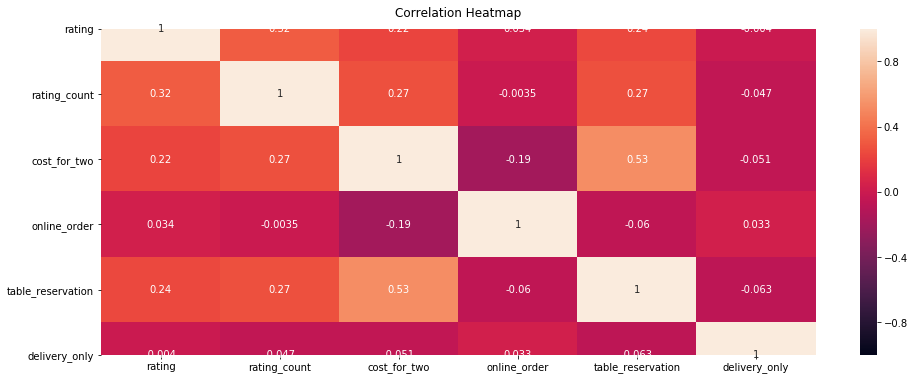

In [21]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(x.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

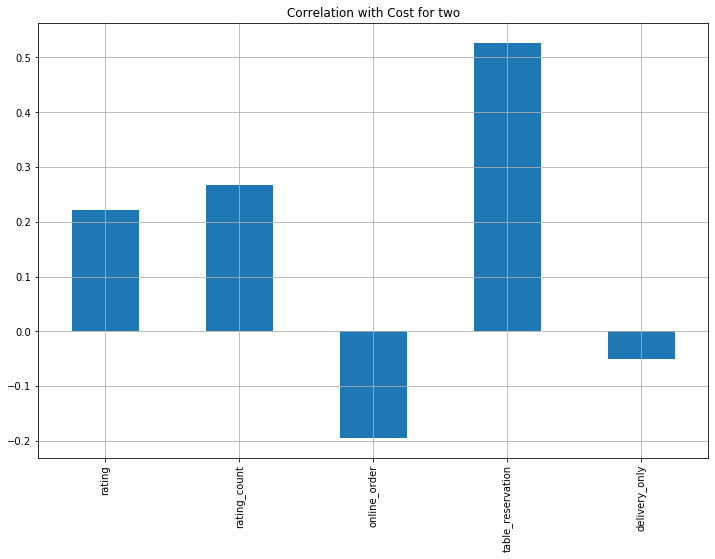

In [22]:
x.drop('cost_for_two', axis=1).corrwith(x.cost_for_two).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with Cost for two")

In [23]:
from sklearn.preprocessing import StandardScaler

X=x[['table_reservation','rating_count','rating']]
y=x['cost_for_two']

temp=[val for val in cont_val if val in X.columns]
sc=StandardScaler()
X[temp]=sc.fit_transform(X[temp])

C:\Users\Aniket\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Aniket\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

In [25]:
mod1=linear_model.LinearRegression()
mod1.fit(xtrain,ytrain)
ypred=mod1.predict(xtest)

In [26]:
from statistics import mean

print(((math.sqrt(metrics.mean_squared_error(ytest, ypred)))/mean(ytest))*100)

65.7168062831401


In [27]:
visdf=pd.DataFrame({'Original':ytest.tolist(),'Predicted':ypred.tolist()})
visdf

,Original,Predicted
0,500.0,576.564764
1,400.0,556.479044
2,850.0,1284.526577
3,700.0,544.893433
4,300.0,451.642000
...,...,...
13239,1200.0,537.794442
13240,100.0,542.003885
13241,200.0,530.041596
13242,500.0,500.889228


In [28]:
visdf['Sr']=visdf.reset_index().index

In [29]:
visdf['Sr']+=1

In [30]:
visdf.head()

,Original,Predicted,Sr
0,500.0,576.564764,1
1,400.0,556.479044,2
2,850.0,1284.526577,3
3,700.0,544.893433,4
4,300.0,451.642000,5


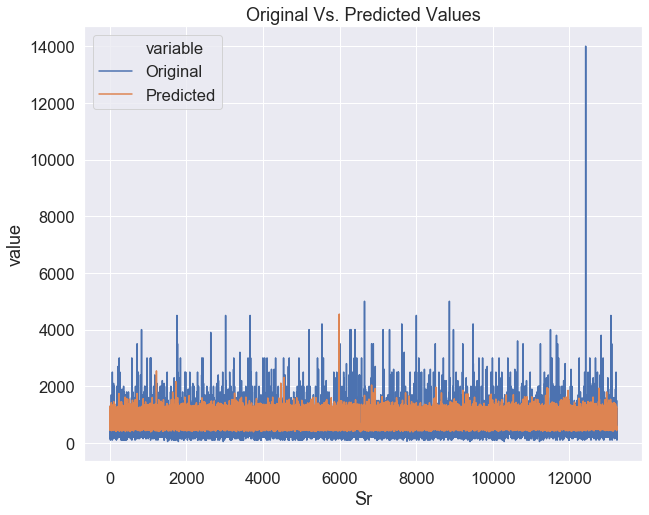

In [32]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
g=sns.lineplot(x='Sr', y='value', hue='variable', data=pd.melt(visdf, ['Sr']))
plt.title("Original Vs. Predicted Values")
plt.show(g)

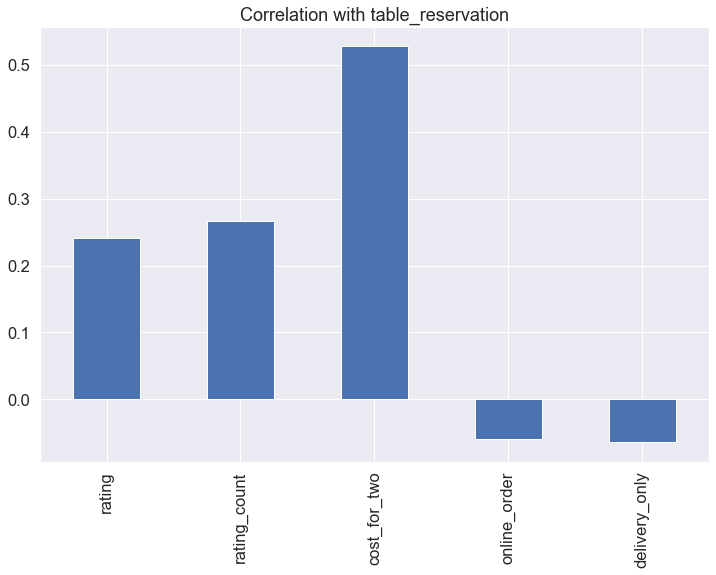

In [33]:
x.drop('table_reservation', axis=1).corrwith(x.table_reservation).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with table_reservation")

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

y=X['table_reservation']
X=X[['rating_count','rating']]

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=1)

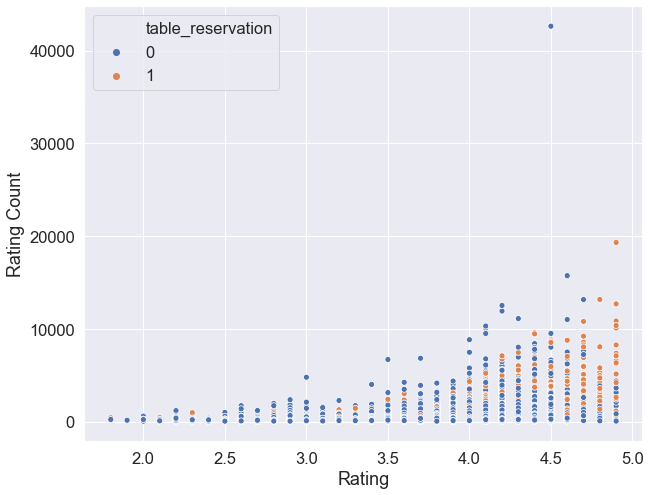

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='rating', y='rating_count',hue='table_reservation',data=fdf)
#plt.plot(fdf['rating_count'], fdf['rating'])
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.legend()
plt.show()

In [37]:
mod2 = LogisticRegression()
mod2.fit(xtrain, ytrain)
predicted_classes = mod2.predict(xtest)
accuracy = accuracy_score(ytest,predicted_classes)
print(accuracy)

0.8942162488674117
